# **Séries Temporais com DeepAR**

## Instalações

In [1]:
# Libs
!pip install mxnet gluonts
!pip install lightning
!pip install orjson
!pip install ujson

## Importações

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.common import ListDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.mx import Trainer

## Base de Dado

In [3]:
# Dados
df = pd.read_csv('petr4_treinamento_ex.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


## Tratamento da Base de Dados

In [4]:
df = df[['Close']]

In [5]:
# Converter DataFrame para o formato esperado pelo GluonTS
train_data = ListDataset(
    [{"start": df.index[0], "target": df['Close'].values}],
    freq="B"
)

In [6]:
# Configurar o modelo DeepAR
estimator = DeepAREstimator(
    freq="B",
    prediction_length=30,  # Prever os próximos 30 dias
    trainer_kwargs={"max_epochs": 10}
)

## Treinamento de um Modelo com GluonTS

In [7]:
# Treinar o modelo
predictor = estimator.train(train_data)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.7 K | [[1, 1], [1, 1], [1, 809, 4], [1, 809], [1, 809], [1, 30, 4]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 2.88664 (best 2.88664), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 2.88664 (best 2.88664), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 1.89845 (best 1.89845), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 1.89845 (best 1.89845), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached 1.58205 (best 1.58205), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: '

## Fazendo as Previsões


In [8]:
# Fazer previsões
forecast_it, ts_it = make_evaluation_predictions(
    dataset=train_data,
    predictor=predictor,
    num_samples=100
)

In [9]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [10]:
ts_entry = tss[0]
forecast_entry = forecasts[0]

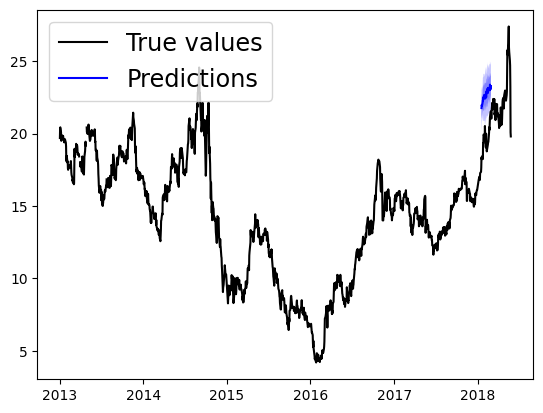

In [11]:
# Plotar séries temporais reais
plt.plot(df["Close"], color="black")

# Plotar previsões
for forecast in forecasts:
    forecast.plot(color="blue", intervals=(0.5, 0.8))

plt.legend(["True values", "Predictions"], loc="upper left", fontsize="xx-large")
plt.show()